## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Import necessary packages and suppress warnings
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# Read in csv of cleaned data 
df = pd.read_csv('data_clean.csv')
df

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Aircraft.Category,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Event.Day,Event.Month,Event.Month.Name,Event.Year
0,0,ID,United States,Destroyed,Stinson,1083,1.0,Reciprocating,Personal,2.0,...,Unknown,2.0,2.0,100.000000,0.000000,100.0,24,10,October,1948
1,1,CA,United States,Destroyed,Piper,pa24180,1.0,Reciprocating,Personal,4.0,...,Unknown,4.0,4.0,100.000000,0.000000,100.0,19,7,July,1962
2,2,VA,United States,Destroyed,Cessna,172m,1.0,Reciprocating,Personal,3.0,...,Unknown,3.0,3.0,100.000000,0.000000,100.0,30,8,August,1974
3,3,CA,United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,...,Unknown,2.0,2.0,100.000000,0.000000,100.0,19,6,June,1977
4,4,MA,United States,Substantial,Boeing,dc9,2.0,Turbo Fan,Unknown,0.0,...,Airplane,45.0,1.0,2.222222,97.777778,0.0,17,9,September,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65781,73708,CA,United States,Substantial,Airbus,ec130t2,1.0,Unknown,Business,0.0,...,Helicopter,1.0,1.0,100.000000,0.000000,0.0,12,12,December,2022
65782,73709,MT,United States,Substantial,Piper,pa42,2.0,Unknown,Unknown,0.0,...,Airplane,1.0,0.0,0.000000,100.000000,0.0,13,12,December,2022
65783,73710,PR,United States,Substantial,Cirrus,sr22,1.0,Unknown,Personal,0.0,...,Airplane,1.0,0.0,0.000000,100.000000,0.0,14,12,December,2022
65784,73711,KS,United States,Substantial,Swearingen,sa226tc,2.0,Unknown,Unknown,0.0,...,Airplane,1.0,0.0,0.000000,100.000000,0.0,15,12,December,2022


## Visualize KPIs

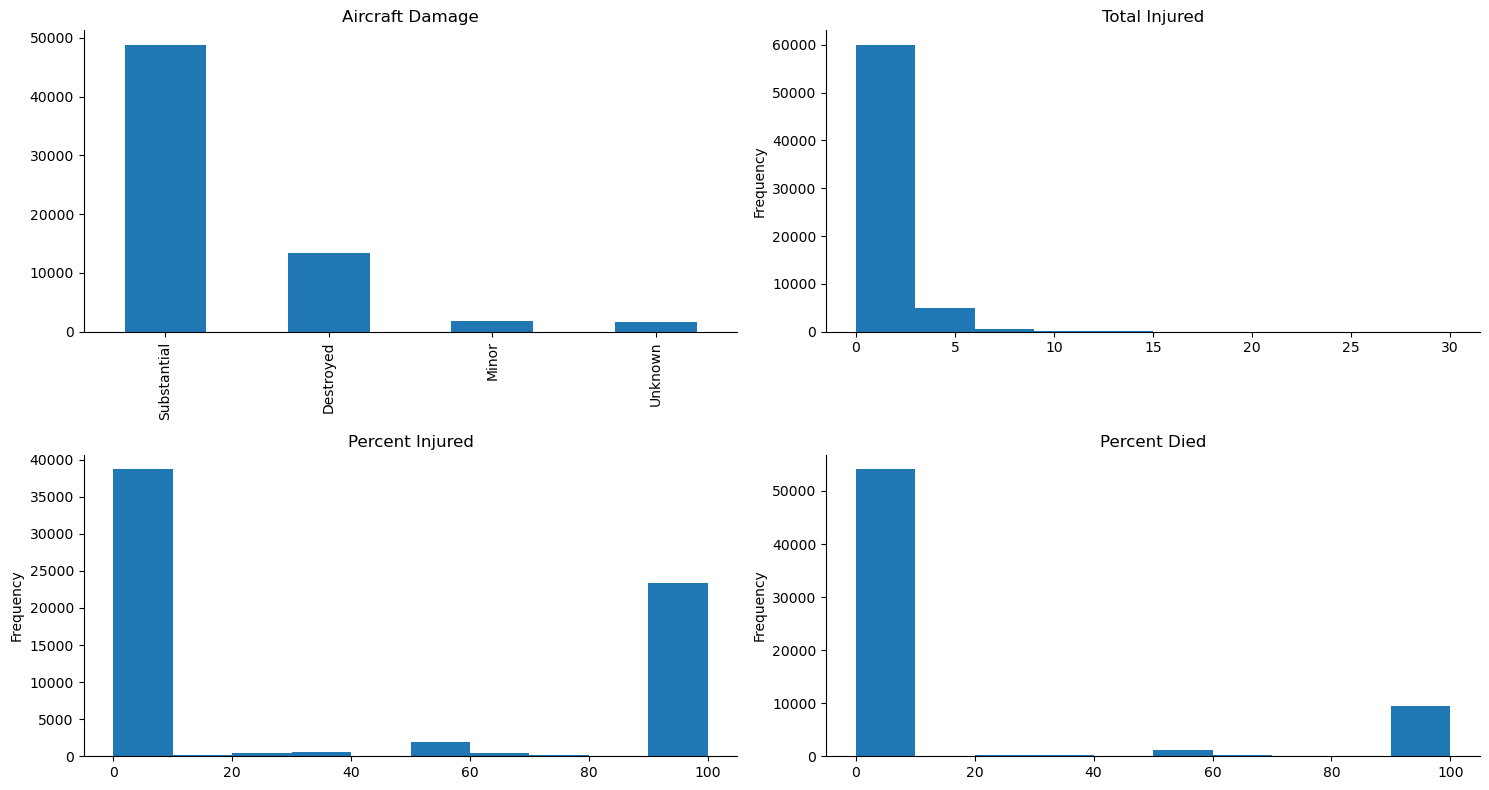

In [3]:
# Visualize distribution of key variables
fig, ax = plt.subplots(2,2, figsize = ((15,8)))

# Aircraft Damage
df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

# Total Injured
df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

# Percent Injured
df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

# Percent Died
df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [4]:
# Generate and print a list of all the popular makes in the dataset
# Note that the cleaned csv only includes incidents involving the top 50 makes 

popular_makes = list(df['Make'].value_counts().index)
print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell', 'Mooney', 'Grumman', 'Bellanca', 'Hughes', 'Air Tractor', 'Aeronca', 'Maule', 'Champion', 'Stinson', 'Cirrus', 'Luscombe', 'Aero Commander', 'De Havilland', 'Taylorcraft', 'Schweizer', 'North American', 'Aerospatiale', 'Airbus', 'Rockwell', 'Hiller', 'Enstrom', 'Ayres', 'Grumman American', 'Embraer', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Fairchild', 'Lake', 'Waco', 'Mitsubishi', 'Aviat', 'Bombardier', 'GrummanSchweizer', 'Socata', 'Ryan', 'Helio', 'Learjet', 'Lockheed', 'Dehavilland', 'Globe', 'Weatherly', 'Wsk Pzl Mielec', 'Ercoupe', 'Aviat Aircraft Inc']


## Damage Index

Each row in the dataset contains information about an aircraft accident. Here, we calculate a damage index to quantify how destructive the accidents were for a particular Make of aircraft. The damage index considers the ratio of planes of a particular Make that were destroyed in the incident, compared to the ratio of planes that with substantial damage and minor damage. 

We assume an exponential relationship between levels of aircraft damage, such that incidents with substantial damage are twice as bad as those with minor damage, but incidents with destroyed planes are four times as bad as those with minor damage. 

The damage index formula is as follows: (ratio destroyed x 4) + (ratio subtantial x 2) + (ratio minor x 1).

In [5]:
# Create a new df for calculating the damage index. In this dataframe, "Unknown" 
# values in the Aircraft Damage column will be randomly assigned a value 

# Find the indices of all unknown values in Aircraft Damage 
unk_indices = list(df.loc[df['Aircraft.damage'] == 'Unknown'].index)

# Calculate the probability of observing each value in the current dataset
damage_probs = df['Aircraft.damage'].value_counts()
damage_probs = damage_probs.drop('Unknown')
damage_probs = damage_probs / damage_probs.sum()

# Randomly generate new values for Aircraft Damage based on probabilities observed in known dataset 
rand_damage = np.random.choice(list(damage_probs.index), size = len(unk_indices), p = list(damage_probs))

# Create a new dataset with the new unknown values in Aircraft Damage replaced 
adj_df = df.copy()
adj_df['Aircraft.damage'].iloc[unk_indices] = rand_damage

In [6]:
# Create a df for the damage index 

di_df = pd.DataFrame(columns = ['Damage_Index', 'Num.Incidents.Make', 'Uninjured_P', 'Injured_P', 'Died_P'], )
pop_means_df = adj_df.groupby('Make').mean(numeric_only=True)

for make in popular_makes:
    make_info = adj_df[adj_df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)

    # Add additional relevant info to damage index df 
    num_incidents = adj_df['Make'].value_counts()[make]
    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [7]:
# Adjust the damage index by penalizing Makes with too few datapoints (n) 
# All with makes with n < threshold are penalized 

threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Num.Incidents.Make'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index')

,Damage_Index,Num.Incidents.Make,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,2.046992,2660.0,79.388114,14.484066,5.477698,1.000000,2.046992
Cessna,2.359004,26178.0,64.193118,35.692282,14.270196,1.000000,2.359004
Piper,2.439471,14365.0,58.658095,41.265330,18.640403,1.000000,2.439471
Bellanca,2.439806,1030.0,55.072816,44.927184,18.988673,1.000000,2.439806
Bell,2.481420,2422.0,52.456202,47.378645,14.959588,1.000000,2.481420
Air Tractor,2.347333,881.0,58.815740,41.184260,15.020810,1.063349,2.496033
Grumman,2.499132,1152.0,66.146612,33.853388,9.557252,1.000000,2.499132
Hughes,2.383408,892.0,58.017564,41.870329,10.394245,1.057145,2.519607
Mooney,2.530455,1297.0,48.496530,51.349268,25.872526,1.000000,2.530455
Beech,2.551959,5129.0,54.037588,45.786939,26.107833,1.000000,2.551959


In [8]:
# Identify the top three makes based on the damage index 
top3makes = list(di_df.sort_values(by = 'Adj_Damage_Index').index[:3])
print(top3makes)

# Add new column to df indicating whether the incident involves a Make in the top 3
df['DI.Top3'] = df['Make'].apply(lambda x: x in top3makes)

['Boeing', 'Cessna', 'Piper']


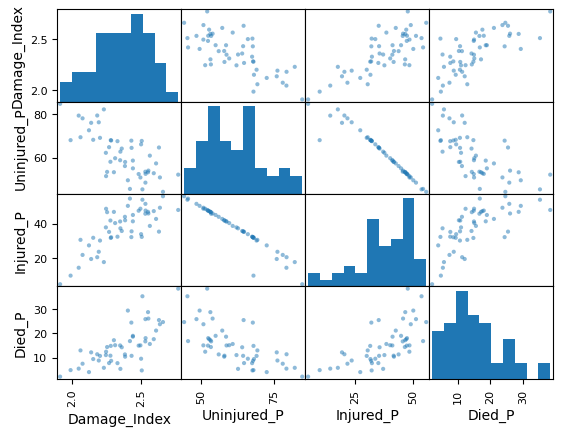

In [9]:
# Validate the damage index by plotting it against key metrics to observe relationships between the variables 
pd.plotting.scatter_matrix(di_df[['Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

## Examine Models from the Top3 Makes

In [10]:
df_top_makes = df[df['Make'].apply(lambda x: x in top3makes)].reset_index(drop=True)

In [11]:
for make in top3makes:
    print(f"{make}:")
    list_models = list(df[df['Make']==make]['Model'].unique())
    print(f"{list_models}\n")

Boeing:
['dc9', 'a75', '737222', 'dc3', 'dc1030', 'dc1010', 'a75n1', 'b7372h4', '727235', 'b727200', '707131b', 'dc982', 'kc135a', '707123b', '727200', 'e75', 'e75n1', 'dc915f', 'b75n1', 'dc861', 'dc3a', 'dc852', 'rb26c', 'dc3c', '75a', 'a75l300', 'b75', 'dc931', '727233', 'n2s1a75a', '727231', 'pt17', '737291', 'a75300n1', 'dc1030f', 'c47', '727', '727225a', '107', 'dc930', '737200', '707300', 'dc10', '727223', '707323c', 'dc951', '737201', '727225', 'a26c', 'dc854f', '747123', 'b737200', '767231', 'dc950', 'dc6a', 'b26c', 'dc910', '747', 'd75n1', '7372h4', '727222', 'dc871', 'dc863f', '727100', '72731h', 'b737222', 'dc1040', '234er', 'dc932', '727222a', 'b747', 'dc4c55b', 'dc7c', 'dc8', '727231a', 'ib75a', '747121', '767', 'bv107ii', 'pt13d', '727223b', 'b727023', '727247', '747200f', '72721', 'dc33c', 'dc980', '72715c', '727232', 'dc915', 'dc1030cf', '727224', 'b72790c', '747230', '72723', 'dc863', '72735', '72731', '720025', 'c118a', '747122', 'dc873', 'dc854', '737130', 'dc851', '

In [12]:
# Clean models 
to_replace = ['stearmane', 'stearman', 'boeing','probertsonstol','skywagon',\
               'kaerobat','psylane','citation','aerobat','hortonstol', 'rileysuper',\
               'aramvi','crileyturbinee','caravan','ector','skyhawk','turbocenturiont','undesignat']
for string in to_replace:
    df_top_makes['Model'] = df_top_makes['Model'].str.replace(string, '')

In [13]:
# Drop rows from rare models (across the entire dataframe) 
rare_models = df_top_makes['Model'].value_counts()
rare_models = rare_models[rare_models <= 20].index.tolist()

drop_rows = df_top_makes.loc[df_top_makes['Model'].apply(lambda x: x in rare_models)].index
df_top_makes = df_top_makes.drop(drop_rows).reset_index(drop=True)
df_top_makes['Model']

0        pa24180
1           172m
2            180
3            140
4        pa28161
          ...   
39284       pa28
39285      a185f
39286       305a
39287        172
39288      r172k
Name: Model, Length: 39289, dtype: object

In [14]:
# Re-examine models from the top3 makes 
for make in top3makes:
    print(f"{make}:")
    list_models = list(df_top_makes[df_top_makes['Make']==make]['Model'].unique())
    print(f"{list_models}\n")

Boeing:
['a75', 'dc3', 'dc1030', 'dc1010', 'a75n1', 'dc982', '727200', 'e75', 'b75n1', 'dc3c', 'dc931', 'pt17', '737200', 'dc951', '747', 'dc932', '767', '737300', '737', '369e', '757', 'md88', '757232', 'md82', 'md11', '500', '7377h4', 'a75n1pt17', '777']

Cessna:
['172m', '180', '140', 'r172k', '172', '152', '150l', '414a', '210l', '182', 't337g', '206', 'tr182', 'a185f', '210', 'tu206g', '172n', 'p210n', '182a', 'tu206f', 'u206', '210n', '310l', '414', 't210n', '310', '150m', '182p', '150', '170b', '180k', '177b', '177rg', '182e', '150h', '340a', '182n', '207', '172rg', '177', '182m', '152ii', 'a188b', '172h', '182l', '172p', 'p206', '150g', 'u206g', '150j', '182h', '182b', '310r', '402b', '185', '172k', '421b', '401', '421', '310d', '172a', '404', '172l', '421c', '210a', '310q', '182c', '170', 't210m', '140a', 'a152', '182rg', '310k', 't188c', '210d', '172g', '501', '182j', '120', '210m', '402c', '340', '180j', '172f', '175', '150f', '182k', 'a185e', 't210l', '170a', '205', '182g',

In [68]:
# Clean Boeing 
def clean_boeing(model_str):

    abr_str = model_str
    
    if model_str in ['dc982', 'md88', 'md82']:
        abr_str = 'md80'

    if model_str in ['dc1030', 'dc1010']:
        abr_str = 'md10'

    if model_str in ['dc982', 'dc931', 'dc951', 'dc932']:
        abr_str = 'md9'
    
    if model_str in ['a75', 'a75n1', 'e75', 'b75n1', 'a75n1pt17', 'pt17']:
        abr_str = 'm75'

    if model_str.startswith('7'):
        abr_str = model_str[:3]

    return abr_str

In [60]:
# Clean Cessna
def clean_cessna(model_str):
    
    abr_str = model_str
    
    for i in model_str:
        if i.isdigit():
            abr_str += i
            
    return abr_str

In [61]:
# Clean Piper
def clean_piper(model_str):
    abr_str = model_str
    if len(model_str) > 3:
        abr_str = 'pa'+model_str[2:4]
    return abr_str

In [75]:
make_model_df = df_top_makes[['Make','Model']]
make_model_df = make_model_df.drop_duplicates(keep='first')
make_model_df


def clean_top3(model_str): 
    make = make_model_df[make_model_df['Model'] == model_str]['Make'].values[0]

    if make == 'Boeing':
        return clean_boeing(model_str)
    
    if make == 'Cessna':
        return clean_cessna(model_str)

    if make == 'Piper':
        return clean_piper(model_str)
    
# if make 
# abr_column = df_top_makes[df_top_makes['Make']=='Boeing']['Model'].apply(clean_Boeing)
# df_top_makes.loc[df_top_makes['Make'] == 'Boeing'] = abr_column

In [76]:
df_top_makes['Abr.Model'] = df_top_makes['Model'].apply(clean_top3)

In [78]:
# Re-examine models from the top3 makes 
for make in top3makes:
    print(f"{make}:")
    list_models = list(df_top_makes[df_top_makes['Make']==make]['Abr.Model'].unique())
    print(f"{list_models}\n")

Boeing:
['m75', 'dc3', 'md10', 'md9', '727', 'dc3c', '737', '747', '767', '369e', '757', 'md80', 'md11', '500500', '777']

Cessna:
['172m172', '180180', '140140', 'r172k172', '172172', '152152', '150l150', '414a414', '210l210', '182182', 't337g337', '206206', 'tr182182', 'a185f185', '210210', 'tu206g206', '172n172', 'p210n210', '182a182', 'tu206f206', 'u206206', '210n210', '310l310', '414414', 't210n210', '310310', '150m150', '182p182', '150150', '170b170', '180k180', '177b177', '177rg177', '182e182', '150h150', '340a340', '182n182', '207207', '172rg172', '177177', '182m182', '152ii152', 'a188b188', '172h172', '182l182', '172p172', 'p206206', '150g150', 'u206g206', '150j150', '182h182', '182b182', '310r310', '402b402', '185185', '172k172', '421b421', '401401', '421421', '310d310', '172a172', '404404', '172l172', '421c421', '210a210', '310q310', '182c182', '170170', 't210m210', '140a140', 'a152152', '182rg182', '310k310', 't188c188', '210d210', '172g172', '501501', '182j182', '120120', 

In [16]:
# Keep Boeing: 
# 'A75', 'A75N1(Pt17)', 'A75N1', 'E75', 'B75N1', '369D'

# Keep but clean:
# '757-232'
# '757-222'
# '727-200'
# '737-300'
# '737-200'

# Find Make:
# 'Dhc-6-300' (look for de Havilland Canada)

# Move to McD: 
# 'Dc-9-82' (change to Md-82), 'Md-88', 'Md-82', 'Md-11', 

# Drop from df:
# 369D - helicopter
# 369E - helicopter

## Model Performance

In addition to understanding which planes are likely to have destructive incidents, we are also interested in which planes have better outcomes for people when they are involved in such incidents. 

To this end, we calculated the performance of each model of plane as a function of whether people had positive outcomes following the incident. 

For planes that had substantial damage or were destroyed, performance was marked as positive if there were no fatalities. 
For planes that had minor damage, performance was marked as positive if there were no fatalities or injuries. 

An overall performance score is generated by calculating the fraction of incidents that met the positive performance criteria over the total number of incidents for each model. 

In [16]:
# Subset the df to select for incidents that meet the positive performance criteria
best_dest = df.loc[(df['Aircraft.damage'] == 'Destroyed') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]
best_subs = df.loc[(df['Aircraft.damage'] == 'Substantial') & (df['Percent.Died'] == 0) & (df['Event.Year'] > 1989) & (df['Percent.Injured'] == 0) & (df['Total.Passengers'] != 0)]
best_minor = df.loc[(df['Aircraft.damage'] == 'Minor') & (df['Percent.Died'] == 0) & (df['Percent.Injured'] == 0) & (df['Event.Year'] > 1989) & (df['Total.Passengers'] != 0)]


In [17]:
# Calculate an overal performance score for each model by calculating 
# the fraction of incidents that met the positive performance criteria 
# divided by the total number of incidents for each model.

d_d = best_dest['Model'].value_counts().to_dict()
d_s = best_subs['Model'].value_counts().to_dict()
d_m = best_minor['Model'].value_counts().to_dict()
all_keys = set()
all_keys.update(d_d.keys())
all_keys.update(d_s.keys())
all_keys.update(d_m.keys())
r_d  = {}
for key in all_keys:
    r_d[key] = d_d.get(key, 0) + d_s.get(key, 0) + d_m.get(key, 0)
result_d = {}
for key in all_keys:
    denominator = df['Model'].value_counts().to_dict().get(key, 1)
       
    if denominator != 0:
        result_d[key] = r_d[key] / denominator
    else:
        result_d[key] = 0 

In [18]:
# Convert the performance dictionary into a pandas series 
model_performance = pd.Series(result_d)
model_performance

m7           0.608696
dc852        0.500000
47d1g        1.000000
e75          0.613636
dc862        0.800000
               ...   
rba          1.000000
sa319b       0.500000
b100         0.444444
at19         1.000000
bl1731atc    1.000000
Length: 2095, dtype: float64

In [19]:
# Confirm there are no null values within the model performance series 
model_performance.isna().sum()

0

## Create CSVs

In [20]:
# Add a df summarizing performance and number of incidents for each model 
model_vc = df['Model'].value_counts()
model_pwdc = pd.concat({'Performance': model_performance, 'Num.Incidents.Model': model_vc}, axis=1)

# Add performance and damage index info to df 
df = df.join(model_pwdc, how='outer',on='Model')
df = df.join(di_df, how='outer', on='Make')

# Remove all models with too few datapoints (20 or fewer) 
df = df.loc[df['Num.Incidents.Model'] >= 20]

In [21]:
x = model_pwdc.reset_index().rename(columns={'index': 'Model'})
y = list(x['Model'][x['Model'].apply(lambda j: j.startswith('Md'))].unique())
y

[]

In [22]:
# Create a df with each model, make, it's performance score, it's corresponding make, and whether that make is top3 
make_model = model_pwdc.reset_index()
make_model = make_model[make_model['Num.Incidents.Model'] > 20].reset_index(drop=True)
make_model = make_model.rename(columns={'index': 'Model'})
make_model = make_model.merge(df.loc[:,['Make', 'Model']], how='left',on='Model')
make_model = make_model.drop_duplicates(subset='Model', keep='first').reset_index(drop=True)
make_model['Top3'] = make_model['Make'].apply(lambda x: x in top3makes)
make_model

,Model,Performance,Num.Incidents.Model,Make,Top3
0,m7,0.608696,23,Maule,False
1,e75,0.613636,44,Boeing,True
2,152ii,0.140625,64,Cessna,True
3,c152,0.370370,27,Cessna,True
4,pa28r180,0.357143,126,Piper,False
...,...,...,...,...,...
512,195a,0.487805,41,Cessna,True
513,7ac,0.382759,290,Bellanca,False
514,8e,0.417722,79,Luscombe,False
515,747,0.357143,42,Boeing,True


In [23]:
#sum(df['Model']=='a75n1pt17')
#df.loc[df['Model'].str.contains('stearman' | 'skywagon' | 'aerobat' | 'turbo' | 'centurion' | 'caravan' | 'citation' | 'robertson' | 'stol' | 'criley')]



In [24]:
# Filter for Models within top3makes 
top_make_model = make_model[make_model['Top3']==True]

best_models = []

for make in top3makes:
    
    # Filter for all Models within one Make 
    subset = top_make_model[top_make_model['Make'] == make]
    
    # Extract best 3 Models within one Make (based on performance) 
    subset = subset.sort_values(by='Performance', ascending = False)['Model'][:5]

    best_models.extend(list(subset))

print(best_models)

['b75n1', 'a75n1pt17', 'e75', 'dhc6300', 'a75n1', 'a185', '172r', '172s', '182t', '182s', '369', 'md88', 'md11', '369e', '269c']


In [25]:
top3makes

['Boeing', 'Cessna', 'Mcdonnel Douglas']

In [26]:
# B75N1: Boeing; military trainer aircraft (https://www.globalair.com/aircraft-for-sale/specifications?specid=158) 
# A75N1(Pt17): Boeing; served as the primary military trainer for a half dozen nations (https://www.mncppc.org/1656/1941-Boeing-A75N1PT-17-Stearman)
# E75: Boeing; military trainer aircraft (https://www.globalair.com/aircraft-for-sale/specifications?specid=642)
# A185: Cessna;  civil utility (general-purpose) six-seat aircraft (https://en.wikipedia.org/wiki/Cessna_185_Skywagon)
# 172R: Cessna; civil utility (general-purpose) four-seat aircraft (https://en.wikipedia.org/wiki/Cessna_172)
# 172S: Cessna; civil utility (general-purpose) four-seat aircraft (https://en.wikipedia.org/wiki/Cessna_172)
# Pa-18-160: Piper; two-seat, single-engine monoplane, commonly found in roles such as bush flying, banner towing and glider towing
# Pa 12: Piper; 
# Pa18: Piper; 

In [27]:
# Add a new column to the df indicating whether the incident involved a top model
df['Top.Model'] = df['Model'].apply(lambda x: x in best_models)
df.head()

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Performance,Num.Incidents.Model,Damage_Index,Num.Incidents.Make,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index,Top.Model
0,0,ID,United States,Destroyed,Stinson,1083,1.0,Reciprocating,Personal,2.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
1092,1162,KY,United States,Substantial,Stinson,1083,1.0,Reciprocating,Personal,0.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
1448,1544,WA,United States,Destroyed,Stinson,1083,1.0,Reciprocating,Personal,0.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
2781,2958,WA,United States,Destroyed,Stinson,1083,1.0,Reciprocating,Personal,2.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
4016,4257,WY,United States,Substantial,Stinson,1083,1.0,Reciprocating,Personal,0.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False


In [28]:
# Create a new dataframe with only the best performing models 
df_top_models = df.loc[df['Top.Model']==True].reset_index(drop=True)
df_top_models

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Performance,Num.Incidents.Model,Damage_Index,Num.Incidents.Make,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index,Top.Model
0,2603,UT,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.359080,26178.0,64.193118,35.692282,14.270196,1.000000,2.359080,True
1,17254,AK,United States,Substantial,Cessna,a185,1.0,Reciprocating,Unknown,0.0,...,0.809524,63,2.359080,26178.0,64.193118,35.692282,14.270196,1.000000,2.359080,True
2,58969,CA,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.359080,26178.0,64.193118,35.692282,14.270196,1.000000,2.359080,True
3,66050,MO,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.359080,26178.0,64.193118,35.692282,14.270196,1.000000,2.359080,True
4,66217,AK,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.359080,26178.0,64.193118,35.692282,14.270196,1.000000,2.359080,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,44459,ID,United States,Substantial,De Havilland,dhc6300,2.0,Turbo Prop,Public Aircraft,0.0,...,0.480000,25,2.287206,383.0,68.077530,31.661374,14.844875,1.479860,3.384745,True
1513,46316,AK,United States,Substantial,De Havilland,dhc6300,2.0,Turbo Prop,Unknown,0.0,...,0.480000,25,2.287206,383.0,68.077530,31.661374,14.844875,1.479860,3.384745,True
1514,46317,AK,United States,Substantial,De Havilland,dhc6300,2.0,Turbo Prop,Unknown,0.0,...,0.480000,25,2.287206,383.0,68.077530,31.661374,14.844875,1.479860,3.384745,True
1515,59888,AZ,United States,Unknown,Dehavilland,dhc6300,2.0,Turbo Prop,Unknown,0.0,...,0.480000,25,2.040000,100.0,69.416667,30.583333,12.974603,2.151293,4.388637,True


In [29]:
df.head()

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Performance,Num.Incidents.Model,Damage_Index,Num.Incidents.Make,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index,Top.Model
0,0,ID,United States,Destroyed,Stinson,1083,1.0,Reciprocating,Personal,2.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
1092,1162,KY,United States,Substantial,Stinson,1083,1.0,Reciprocating,Personal,0.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
1448,1544,WA,United States,Destroyed,Stinson,1083,1.0,Reciprocating,Personal,0.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
2781,2958,WA,United States,Destroyed,Stinson,1083,1.0,Reciprocating,Personal,2.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False
4016,4257,WY,United States,Substantial,Stinson,1083,1.0,Reciprocating,Personal,0.0,...,0.5,100,2.267123,438.0,64.840183,35.159817,7.762557,1.412768,3.20292,False


In [30]:
df_top_models.head()

,index,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,...,Performance,Num.Incidents.Model,Damage_Index,Num.Incidents.Make,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index,Top.Model
0,2603,UT,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.35908,26178.0,64.193118,35.692282,14.270196,1.0,2.35908,True
1,17254,AK,United States,Substantial,Cessna,a185,1.0,Reciprocating,Unknown,0.0,...,0.809524,63,2.35908,26178.0,64.193118,35.692282,14.270196,1.0,2.35908,True
2,58969,CA,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.35908,26178.0,64.193118,35.692282,14.270196,1.0,2.35908,True
3,66050,MO,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.35908,26178.0,64.193118,35.692282,14.270196,1.0,2.35908,True
4,66217,AK,United States,Substantial,Cessna,a185,1.0,Reciprocating,Personal,0.0,...,0.809524,63,2.35908,26178.0,64.193118,35.692282,14.270196,1.0,2.35908,True


In [31]:
#df.to_csv('priv_analyzed.csv', index_label = 'index')
#df_top_models.to_csv('priv_top_model.csv', index_label = 'index')

In [32]:
df.shape

(56776, 35)